# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
mnist = io.loadmat('/content/drive/MyDrive/Tobigs/week4/Week4_Dimension_Reduction/Week4_Dimension_Reduction/Assignment/mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [ ]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [ ]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [ ]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

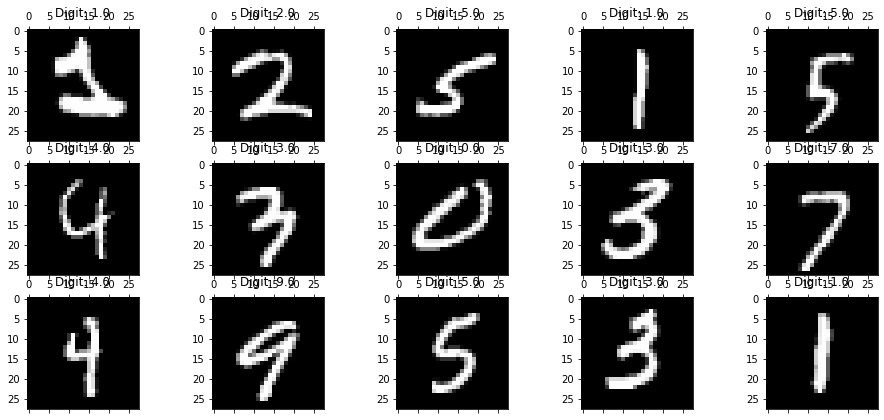

In [ ]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [ ]:
from sklearn.model_selection import train_test_split
y=df['y']
X=df.drop('y',axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=34)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

참고 사이트: <br>
https://techblog-history-younghunjo1.tistory.com/134 <br>
https://velog.io/@yuns_u/PCA-Scree-Plot

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=783)
pc = pca.fit_transform(x_train)

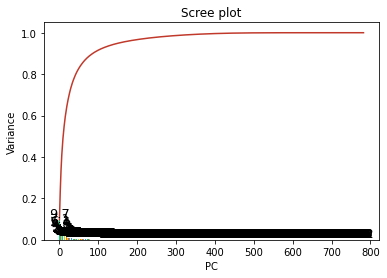

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

참고한 페이지에서 일단 변수의 갯수를 주성분 갯수로 하고 보라고 해서 본건데....<br>
범위를 줄여서 다시 해봐야 할것 같다.

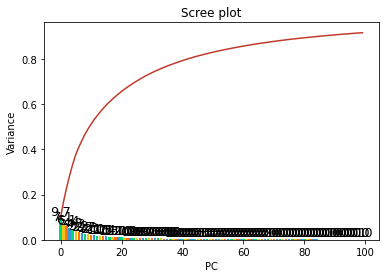

In [ ]:
pca1 = PCA(n_components=100)
pc1 = pca1.fit_transform(x_train)
scree_plot(pca1)

50부터 기울기가 완만해진다는 가정하에 다시한번...

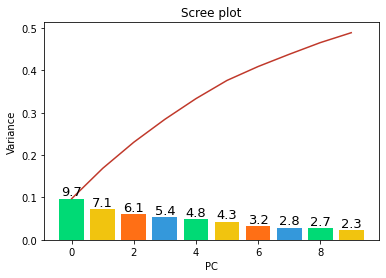

In [ ]:
pca3 = PCA(n_components=10)
pc3 = pca3.fit_transform(x_train)
scree_plot(pca3)

elbow point 가 보이지 않으니 범위를 더....줄여본다

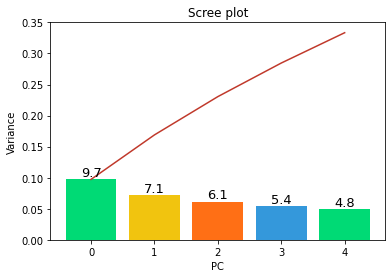

In [ ]:
pca4 = PCA(n_components=5)
pc4 = pca4.fit_transform(x_train)
scree_plot(pca4)

In [ ]:
pca = PCA(n_components=784)
pca_array = pca.fit_transform(x_train)
pca_df = pd.DataFrame(pca_array, index=x_train.index,
                      columns=[f"pca{num+1}" for num in range(x_train.shape[1])])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca775,pca776,pca777,pca778,pca779,pca780,pca781,pca782,pca783,pca784
24777,-56.715292,866.577106,113.411082,224.309413,70.554025,230.810537,-472.840524,232.948785,-305.267357,167.803213,...,0.000000e+00,0.000000e+00,0.000000e+00,8.065764e-12,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
48617,38.627755,44.433692,154.815893,-796.992764,409.477306,307.104478,-212.353100,15.731264,165.537074,427.503871,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.915529e-14,1.306102e-12,1.395322e-12,-5.866484e-13,8.445073e-14,-8.168279e-14,4.821310e-14
66059,332.095546,276.274518,-150.921911,968.938502,503.586291,-270.863053,-0.158383,-168.204608,140.597122,-423.382978,...,0.000000e+00,0.000000e+00,0.000000e+00,-9.895376e-14,-1.147800e-13,-3.591924e-13,9.561741e-14,1.334279e-13,2.124676e-14,3.500279e-14
60634,-440.726508,-63.970641,373.289749,225.529687,-137.215724,359.420591,-474.908110,402.604668,-61.993945,-182.623390,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.724653e-14,3.840727e-13,-2.277007e-13,-2.031912e-13,6.762671e-13,1.033285e-13,2.801961e-14
2241,752.885645,358.768520,674.050235,-193.760829,757.183472,-297.586853,631.445969,136.009083,-201.765285,-52.559834,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.167556e-14,2.500446e-13,1.069200e-13,3.318789e-13,1.468272e-15,4.970498e-14,-8.679549e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23453,-224.513559,13.707462,237.624298,-830.368454,195.350582,111.848297,-135.249112,753.840483,459.892626,-120.488853,...,2.604474e-15,-4.985027e-15,-5.494017e-16,-1.160499e-15,1.973096e-15,1.478102e-15,4.992006e-15,5.905097e-16,2.852286e-15,-7.475733e-16
55319,-464.539717,728.148060,73.405841,-187.791546,-108.965099,-366.241142,-53.995799,34.713255,190.122091,231.198377,...,-8.545594e-16,-4.535235e-15,2.143498e-16,-1.086170e-15,-2.189283e-15,1.259698e-15,-1.326617e-15,-3.572219e-15,-8.757731e-16,-8.295146e-16
5671,1127.860688,-190.410810,-305.645247,322.166550,-402.334645,10.570982,28.313562,-663.225920,-221.502796,-130.864521,...,2.726955e-15,8.061496e-16,-2.928573e-16,2.013926e-15,-2.414991e-15,-3.000913e-17,-1.227168e-15,-1.667445e-16,-2.405205e-17,4.952620e-16
8926,-795.668430,-158.418443,-115.439279,130.746605,-412.739844,-425.630633,197.281780,-257.691717,-233.805116,196.601006,...,-5.595741e-16,3.732026e-16,2.088647e-16,-2.056263e-15,1.621193e-15,3.445791e-16,-4.736842e-16,2.573794e-16,-8.633250e-16,1.651926e-16


In [ ]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(x_train.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result.head(50)

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,333679.683550,0.097248,0.097248
pca2,245828.188113,0.071644,0.168892
pca3,211521.747736,0.061646,0.230538
pca4,185535.357883,0.054073,0.284611
pca5,167502.669855,0.048817,0.333428
pca6,147620.224472,0.043023,0.376451
pca7,112435.549472,0.032768,0.409219
pca8,99032.345151,0.028862,0.438081
pca9,94581.377927,0.027565,0.465646
pca10,80597.532091,0.023489,0.489136


pca43에서 누적비율이 80% 언저리이므로 783개 변수를 43개로 줄인다.<br>
근데 이렇게 하는게 맞나...?

LDA <br>
참고 사이트: https://chrisalbon.com/code/machine_learning/feature_engineering/select_best_number_of_components_in_lda/

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(X,y)

LinearDiscriminantAnalysis(n_components=2)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=None)
X_lda = lda.fit(x_train,y_train)

In [ ]:
# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

In [ ]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
# Run function
select_n_components(lda_var_ratios, 0.95)

8

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

참고 사이트:https://blockdmask.tistory.com/549

In [ ]:
import math
import time
import datetime



### Decision tree



In [ ]:
from sklearn.tree import DecisionTreeClassifier

원본 데이터

In [ ]:
#원본데이터
start = time.time()
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
dt_clf.predict(x_test)
end = time.time()


sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0])

0:00:27.621932
0:00:27


PCA 데이터

In [ ]:
pca = PCA(n_components=43)
pca_array = pca.fit_transform(x_train)
pca_df = pd.DataFrame(pca_array, index=x_train.index,
                      columns=[f"pca{num+1}" for num in range(43)])

In [ ]:
pca_array_test = pca.fit_transform(x_test)
pca_df_test = pd.DataFrame(pca_array_test, index=x_test.index,
                      columns=[f"pca{num+1}" for num in range(43)])

In [ ]:
#PCA 데이터
start = time.time()
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(pca_df, y_train)
dt_clf.predict(pca_df_test)
end = time.time()


sec = (end - start)
result = datetime.timedelta(seconds=sec)
print(result)

result_list = str(datetime.timedelta(seconds=sec)).split(".")
print(result_list[0]) 

0:00:09.317127
0:00:09


헐 진짜 줄어들었어....신기하다

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=8)
X_lda = lda.fit_transform(x_train,y_train)
lda_df = pd.DataFrame(X_lda, index=x_train.index,
                      columns=[f"pca{num+1}" for num in range(8)])

In [ ]:
X_lda = lda.fit_transform(x_test,y_test)
lda_df_test = pd.DataFrame(X_lda, index=x_test.index,
                      columns=[f"pca{num+1}" for num in range(8)])

특정한 틀 없이 자유롭게 해주시면 됩니다!